## COMP 309 - Assignment 3 

### Part 1: Exploratory Data Analysis

**Import dependencies:**

In [1]:
import pandas as pd

**Acquire training set:**

In [2]:
# assign dataset names
list_of_names = ['alternative', 'blues', 'childrens music', 
                 'comedy', 'electronic', 'folk', 'hip-hop', 
                 'movie', 'ska', 'soul']
 
# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv(list_of_names[i] + ".csv")
    dataframes_list.append(temp_df)
    
# assign names to each dataframe:
pos = 0
for dataframe in dataframes_list:
    dataframe.name = list_of_names[pos]
    pos = pos + 1

**Explore training set features:**

In [3]:
# initialisations:
dataframe_names =  []
dataframe_shapes = []
dataframe_features = []

# acquire frame names and corresponding shapes:
for dataframe in dataframes_list:
    dataframe_names.append(dataframe.name)
    dataframe_shapes.append(dataframe.shape)
    dataframe_features.append(dataframe.columns)
    
# set operation check: check to see if all training 
# files provided have the same exact features on each other:
message = ""
for i in range(len(dataframes_list) - 1):
    if (list(dataframes_list[i].columns) != list(dataframes_list[i+1].columns)):
        message="\nWARNING: Non-identical features present."
        break
    else:
        message="\nFeatures are identical \nacross all training files."
print(message)

# display results in tabular format:
list_zip = zip(dataframe_names, dataframe_shapes)
table = pd.DataFrame(list_zip)
table.columns = ['name', 'shape']
table


Features are identical 
across all training files.


name       shape
0      alternative  (5000, 19)
1            blues  (5000, 19)
2  childrens music  (5000, 19)
3           comedy  (5000, 19)
4       electronic  (5000, 19)
5             folk  (5000, 19)
6          hip-hop  (5000, 19)
7            movie  (5000, 19)
8              ska  (5000, 19)
9             soul  (5000, 19)

**Preparing the training set:** From the table of results shown above it appears that each csv file belonging to the training set is exactly the same size to each other, 5000 instances and 19 features per file. The final **merged** training set is, therefore, expected to contain a total of 50000 instances and 19 features.

A *set operation check* was also carried out where the set of features (including how the features are ordered) was checked across all files to see if they were identical. Since consistency of feature content and placement has been confirmed across all 10 files it is now safe to assume that no information wll be lost when generating the final training set by concatenation. These findings illustrate good data preparation and entry on the part of the dataset provider.

**Acquiring the training set:**

In [4]:
train_set = pd.concat(dataframes_list)

In [5]:
train_set

instance_id              artist_name                        track_name  \
0           50010                  Chromeo     Come Alive (feat. Toro Y Moi)   
1           50011                    Sango                How Do You Love Me   
2           50012           Counting Crows                             Omaha   
3           50013  Bullet For My Valentine                           Over It   
4           50014                Shinedown                     Asking For It   
...           ...                      ...                               ...   
4995       172995           Penguin Prison                       Calling Out   
4996       172996                 Beauvois                              Mars   
4997       172997              empty_field                          SupaStar   
4998       172998                     Seal                         Don't Cry   
4999       172999                Z.Z. Hill  That Ain't The Way You Make Love   

                    track_id  popularity  acousticness  danceability  \
0     0ZulY8etRzj54NLYOYX7jy          43      0.225000         0.845   
1     1jgkBLmR16qqZzEG5LYZN5          47      0.665000         0.862   
2     50o13VmOJiUj3WfU7XmEAn          48      0.238000         0.590   
3     5BRGRuHRfvGgoIvZg3PE3x          60      0.000077         0.374   
4     0BpgI6YcYv3ENGLp7XJsAH          58      0.002730         0.449   
...                      ...         ...           ...           ...   
4995  1fpfYMT2RTc5W3Zluq5xVA          41      0.113000         0.857   
4996  3DlgDXIYtnWtJKiB8bZQMv          48      0.381000         0.665   
4997  66EaKY9rBKpoPdxVeB78IP          41      0.071100         0.796   
4998  7oCHyJtJiApwXeVVwJc9z3          42      0.727000         0.283   
4999  4Sd5tbNP4q8wS64abqwfkN          39      0.413000         0.576   

      duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0          238680   0.746          0.000088   F    0.0785    -5.655  Minor   
1          166154   0.342          0.000082  A#    0.1020   -10.095  Minor   
2          219400   0.517          0.000000   A    0.1820    -9.239  Major   
3              -1   0.971          0.000000   B    0.3220    -4.284  Minor   
4              -1   0.971          0.000000  A#    0.1410    -3.660  Major   
...           ...     ...               ...  ..       ...       ...    ...   
4995       238627   0.669          0.016800   C    0.1100    -5.722  Major   
4996       243794   0.369          0.914000   C    0.1080   -16.111  Major   
4997       252347   0.466          0.000000   C    0.2560    -9.386  Minor   
4998       377907   0.421          0.000095   D    0.3300    -8.112  Major   
4999       225560   0.528          0.001680  G#    0.1240    -9.030  Minor   

      speechiness    tempo time_signature  valence        genre  
0          0.0383   129.97          4-Apr   0.9610  Alternative  
1          0.0551  129.992          4-Apr   0.1770  Alternative  
2          0.0312   80.883          4-Apr   0.5660  Alternative  
3          0.0697   97.625          4-Apr   0.7010  Alternative  
4          0.0476  144.031          4-Apr   0.4140  Alternative  
...           ...      ...            ...      ...          ...  
4995       0.0562  122.779          4-Apr   0.9650         Soul  
4996       0.0483  100.015          4-Apr   0.0335         Soul  
4997       0.3040   92.301          4-Apr   0.6530         Soul  
4998       0.0305   92.545          3-Apr   0.1510         Soul  
4999       0.0376   78.117          4-Apr   0.7160         Soul  

[50000 rows x 19 columns]

The shape of the concatenated training set agrees with our expectation (50,000 instances x 19 features)

**Acquiring test set:**

In [6]:
test_set = temp_df = pd.read_csv("test.csv")

In [7]:
test_set

instance_id             artist_name         track_name  \
0                1                 Tsuruda           Brrrap!!   
1                2         Aretha Franklin      Soul Serenade   
2                3                  Asiahn          Curiosity   
3                4       Dora The Explorer  Ni Hao My Friends   
4                5            Matthew West  Hello, My Name Is   
...            ...                     ...                ...   
30926        30927  Kimbo Children's Music     The Royal Ball   
30927        30928                Interpol         Obstacle 1   
30928        30929             Iron & Wine        Lion's Mane   
30929        30930                Wardruna           Helvegen   
30930        30931        Three Days Grace     Me Against You   

                     track_id  popularity  acousticness  danceability  \
0      2ESzaP7ZoabnJA3TTG71Ul          41      0.255000         0.699   
1      18sDWMHFfgDOh1zMrFJt1C          38      0.364000         0.649   
2      7itEG38P49CQ3miMcoYzJe          55      0.445000         0.457   
3      4yK3xXuNrkSq0OVjKUaCkY           7      0.332000         0.756   
4      7GxBuIJugWanLsYj0mDrFX          54      0.000583         0.595   
...                       ...         ...           ...           ...   
30926  33pgY0vezKpyTEU5MYQDZk           0      0.367000         0.609   
30927  0xjdytIAHKrjsdHoLDkq4p          59      0.000052         0.377   
30928  69pwmeyvQMuHMtkCmpEWhQ          43      0.884000         0.603   
30929  4qZh3yJ7tILlDD0Wmv7Ftj          57      0.657000         0.234   
30930  3Be38YoxiGBLHQ8lQRJoqw          53      0.000269         0.614   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0           218733   0.949          0.256000  F#    0.0983    -4.110  Minor   
1           159067   0.296          0.000008  G#    0.1320    -9.389  Major   
2           234802   0.425          0.000000   E    0.0714   -10.500  Minor   
3            78760   0.543          0.000000  G#    0.3330    -5.477  Major   
4           223427   0.894          0.000001   B    0.3260    -4.115  Major   
...            ...     ...               ...  ..       ...       ...    ...   
30926       205840   0.498          0.000000   G    0.0756    -7.197  Major   
30927       251333   0.937          0.578000   F    0.0676    -4.898  Major   
30928           -1   0.346          0.916000   G    0.1040   -11.481  Major   
30929       431867   0.510          0.293000   F    0.5450   -13.398  Minor   
30930       209027   0.826          0.000002   G    0.0989    -7.395  Minor   

       speechiness    tempo time_signature  valence  
0           0.3890  146.064          4-Apr    0.365  
1           0.0334   81.911          4-Apr    0.600  
2           0.2430  201.472          4-Apr    0.498  
3           0.0279    88.98          4-Apr    0.839  
4           0.0323  101.987          4-Apr    0.643  
...            ...      ...            ...      ...  
30926       0.0546  189.823          3-Apr    0.664  
30927       0.0649  120.532          4-Apr    0.375  
30928       0.0303    88.45          4-Apr    0.619  
30929       0.0498        ?          4-Apr    0.191  
30930       0.0514  111.997          4-Apr    0.431  

[30931 rows x 18 columns]

In [8]:
# find out of the features in the train set 
# agree with the features in the testing set:
test_set.columns.symmetric_difference(train_set.columns)

Index(['genre'], dtype='object')

When testing to see if the features in the training set agree with the features in the test set, a discrepency in the number of columns was reported. Upon performing a set operation to find any non-common features between the training set and the test set, the uncommon feature was reported to be **"genre"**. This makes sense as genre is meant to be interpreted as the target variable to be predicted rather than an explanatory variable. 

**Dimensions of the training set:** 

Based on the results shown above, it can be observed that the training set has 50,000 instances and 19 features. This gives a potential total of 950,000 cells to process during training implying that underfitting as a direct result of a lack of data will not be an issue. 

However, processing times may be lengthy if care is not exercised when conducting data preprocessing and in constructing the machine learning model. Given the scale of the data involved and the limited time available for this assignment, efficiency is going to be crucial. 

**Data types of the features in the training set:**

In [9]:
feature_types = pd.DataFrame(train_set.dtypes)
feature_types

0
instance_id         int64
artist_name        object
track_name         object
track_id           object
popularity          int64
acousticness      float64
danceability      float64
duration_ms         int64
energy            float64
instrumentalness  float64
key                object
liveness          float64
loudness          float64
mode               object
speechiness       float64
tempo              object
time_signature     object
valence           float64
genre              object

The type of each feature is important. Strings may need to be converted into numeric data like floating-point numbers or integers in order to represent categorical or ordinal values. This makes the categorical features compatible with the machine-learning model's ability to process data. Initial exploration of the feature types reports eight potentially problematic features that need consideration when encoding. The remaining features can be considered to be **numerical explanatory variables** so basic imputation of the mean or median would suffice as an initial assumption.

Further analysis will be needed on the following features during preprocessing due to their non-numeric nature: 

1. **artist_name** 
2. **track_name** 
3. **track_id**
4. **key** 
5. **mode** 
6. **tempo** 
7. **time_signature**
8. **genre**

**Descriptive Statistics, 5-Number Summary:**

In [10]:
train_set.describe().round(0)

instance_id  popularity  acousticness  danceability  duration_ms  \
count      50000.0     50000.0       50000.0       50000.0      50000.0   
mean      126286.0        38.0           0.0           1.0     181711.0   
std        79504.0        18.0           0.0           0.0     145614.0   
min        43000.0         0.0           0.0           0.0         -1.0   
25%        62501.0        25.0           0.0           0.0     107850.0   
50%       102540.0        41.0           0.0           1.0     195308.0   
75%       170499.0        51.0           1.0           1.0     246936.0   
max       313859.0        96.0           1.0           1.0    4830606.0   

        energy  instrumentalness  liveness  loudness  speechiness  valence  
count  50000.0           50000.0   50000.0   50000.0      50000.0  50000.0  
mean       1.0               0.0       0.0      -9.0          0.0      0.0  
std        0.0               0.0       0.0       4.0          0.0      0.0  
min        0.0               0.0       0.0     -38.0          0.0      0.0  
25%        0.0               0.0       0.0     -11.0          0.0      0.0  
50%        1.0               0.0       0.0      -8.0          0.0      0.0  
75%        1.0               0.0       0.0      -6.0          0.0      1.0  
max        1.0               1.0       1.0       4.0          1.0      1.0

Figures reported in the 5-number summary table above are rounded to the nearest integer for ease of visual processing. It can be observed that there are **numerical** features which contain value ranges that are far more extreme than those belonging to other features. For example: range(*duration_ms*) ≈ 4,830,000 and range(*popularity*) ≈ 96. This introduces an extreme skew in the distribution of the training set and can be visually observed int he multi-boxplot below where **duration_ms** appears to be most responsible for skewing the distribution significantly. 

Considering that outliers are mosty responsible for the skew in the **duration_ms** feature and that the distribution of the data is still heavily skewed when the **duration_ms** feature is removed, both scaling and outlier removal will be considered during data preprocessing.

In [11]:
# import dependencies:
import seaborn as sns
from matplotlib import pyplot as plt

[Text(0.5, 1.0, '\nBoxplots of numerical features in Song dataset excluding duration_ms\n')]

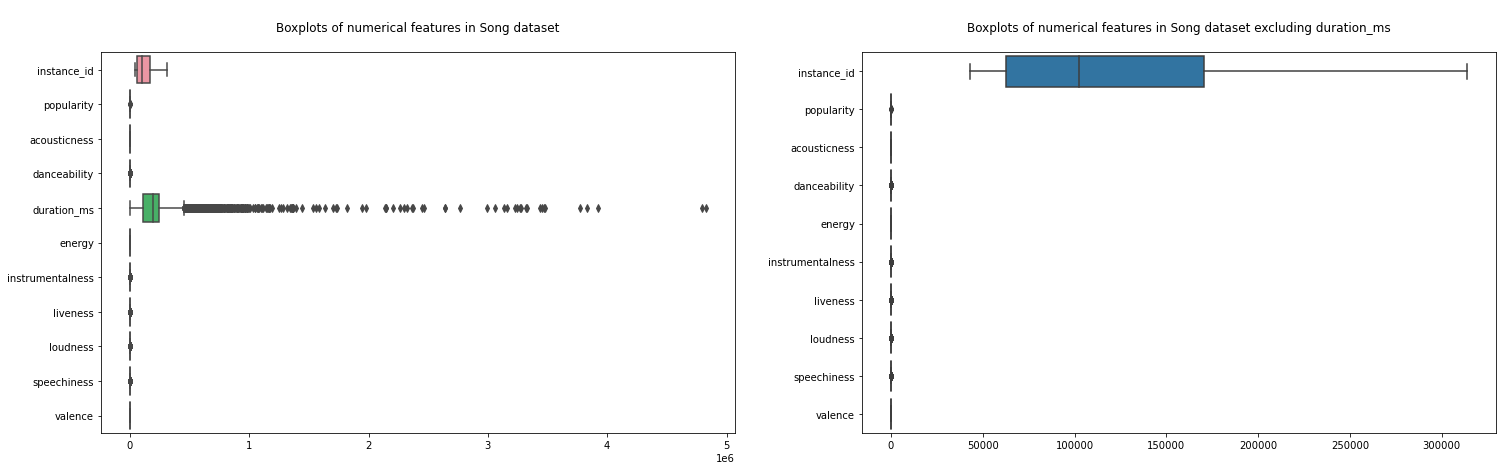

In [12]:
# set up subplots:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))

# display multi-boxplot (original):
sns.boxplot(data=train_set, orient='h', ax=ax[0]).set(title='\nBoxplots of numerical features in Song dataset\n')

# display multi-boxplot (duration_ms feature removed):
sns.boxplot(data=train_set.drop('duration_ms', axis=1), orient='h', ax=ax[1]).set(title='\nBoxplots of numerical features in Song dataset excluding duration_ms\n')

It can also be observed from the 5-number summary that a value of -1 was yielded under the **duration_ms** feature. Considering the context of the feature, this value is nonsensical and further investigation will be conducted below where both the minimum and maximum values of each numerical feature will be reported: 

**Numerical features - Detecting the presence of potential NaN values encoded as something else:**

In [13]:
# initialisation:
numerical_feature_labels = train_set.describe().columns
min_vals = []
max_vals = []

# acquire min/max values of each numerical feature:
for i in range(len(train_set.columns)):
    if (train_set.columns[i] in numerical_feature_labels):
        current_feature = train_set.columns[i]
        min_vals.append(min(train_set[current_feature]))
        max_vals.append(max(train_set[current_feature]))
        
# display results in tabular format:
minmax_vals = zip(min_vals, max_vals)
results = zip(numerical_feature_labels, minmax_vals)
table = pd.DataFrame(results)
table.columns = ['feature name', '(min, max)']
table

feature name         (min, max)
0        instance_id    (43000, 313859)
1         popularity            (0, 96)
2       acousticness  (1.28e-06, 0.996)
3       danceability    (0.0617, 0.989)
4        duration_ms      (-1, 4830606)
5             energy  (0.000216, 0.999)
6   instrumentalness       (0.0, 0.993)
7           liveness      (0.0124, 1.0)
8           loudness   (-38.445, 3.744)
9        speechiness    (0.0222, 0.965)
10           valence         (0.0, 1.0)

From the table of results reported it can be observed that the following features have problematic entries that lie outside of the valid ranges:<br><br>1. **duration_ms**  (0.0 - 1.0): contains -1.<br><br>2. **loudness** (-60 - 0): contains values higher than 0, which is explicitly described in the Spotify documentation as **atypical** implying that the occurrence of these values is **not impossible**. Further investigation shows that the proportion of values found to be greater than 0 is 0.05%. Since this is a significantly small proportion of values, it is safe to assume that these values are invalid entries, however, because the possibility is not zero, we will leave the values to be processed by outlier detection rather than encoding them into NaNs. 

Due to time-constraints, further investigation to ascertain the exact nature of these problem values will be omitted from this study, and a naive assumption that values that lie outside the ranges defined to be valid reported above (with the exception of **loudness**) are missing values and will be encoded as NaNs.

In [14]:
# compute proportion of loudness values geater than 0:
counter = 0
loudness = list(train_set['loudness'])
for i in range(len(loudness)):
    if loudness[i] > 0:
        counter = counter + 1
        
# display results:
print("Proportion of loudness values greater than 0 =", counter/len(loudness) * 100, 'percent')

Proportion of loudness values greater than 0 = 0.05 percent


*Sources:*

[1] https://www.kaggle.com/datasets/tomigelo/spotify-audio-features


[2] https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features


[3] https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track

**Categorical features - Detecting the presence of potential NaN values encoded as something else:**

In [15]:
# import dependencies:
import numpy as np

In [16]:
# initialisation:
categorical_feature_labels = train_set.columns.difference(numerical_feature_labels)

# an assumption that special characters are used to encode NaN values will be made: 
listings = []
feature_names = []
possible_nan_values = []
for i in range(len(train_set.columns)):
    feature = train_set.columns[i]
    if feature in categorical_feature_labels:
        column = train_set[feature]
        listings.append(np.array(column))
        feature_names.append(feature)

In [17]:
# code contd...
special_characters = ["empty_field", "?"]
test = []
feature_where_nan_found = []
for i in range(len(listings)):
    current_feature = listings[i]
    for j in range(len(current_feature)):
        entry = current_feature[j]
        if ( (entry in special_characters) and (entry not in possible_nan_values)):
            possible_nan_values.append(entry)
            feature_where_nan_found.append(feature_names[i])
            break

In [18]:
# code contd...
print("\nCategorical features with\npotential invalid values entered:")
list_zip = zip(feature_where_nan_found, possible_nan_values)
table = pd.DataFrame(list_zip)
table.columns = ['Feature', 'Inv. value?']
table


Categorical features with
potential invalid values entered:


Feature  Inv. value?
0  artist_name  empty_field
1        tempo            ?

**Having to anticipate potential NaN values:**

Upon further investigation, we encounter potential invalid values entered into some of the cells. Example..., having to anticipate keys as well it would appear that the only unique values that do not conform to the conventional or expected values found within all **categorical** feature columns is the **' ? '** character. It will be naively assumed that any entry/cell that contains a **' ? '** character was meant to be a representation of an invalid entry and therefore should be considered as a missing value equivalent. 

1. train_set['time_signature'].unique()
2. train_set['genre'].unique()
3. train_set['key'].unique()
4. train_set['mode'].unique()


5. **train_set['tempo'].unique()**        <- HANDLED
6. **train_set['artist_name'].unique()**  <- HANDLED
7. **train_set['track_id'].unique()** <- may not be necessary to handle as it may have high correlation with id_instance and therefore can be dropped.
8. **train_set['track_name'].unique()** <- no way of telling

Sources:

[4] https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

[5] https://www.fachords.com/how-many-keys/

**Detection of actual NaN values:**

In [19]:
# compute percentage of missing values per feature in the data set:
percent_missing = train_set.isnull().sum() * 100 / len(train_set)
missing_values = pd.DataFrame({'column_name':train_set.columns,
                               'percent_missing':percent_missing.round(2)})

missing_values.drop(missing_values.index[missing_values['percent_missing'] == 0], inplace=True)
print('\nThere are', len(missing_values), 'features that contain NAs.')
missing_values


There are 0 features that contain NAs.


Empty DataFrame
Columns: [column_name, percent_missing]
Index: []

There does not appear to be any 'NaN' encoded missing values present in the dataset. The findings reported above indicate that imputation or even replacement with the NaN value, for some entries in the cells of approppriate features, will be considered before handling of missing values is conducted.

**Distribution of classes:**

In [20]:
class_counts = pd.DataFrame(train_set.groupby('genre').size())
class_counts.columns = ['class size']

In [21]:
class_counts

class size
genre                       
Alternative             5000
Blues                   5000
Children's Music        5000
Comedy                  5000
Electronic              5000
Folk                    5000
Hip-Hop                 5000
Movie                   5000
Ska                     5000
Soul                    5000

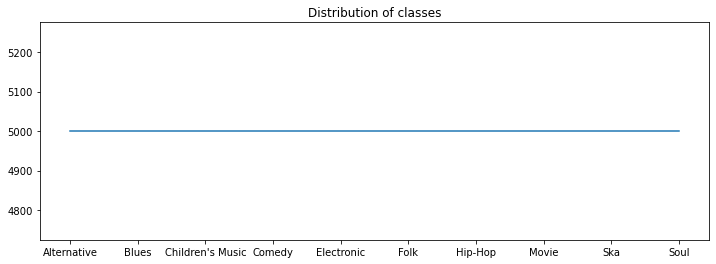

In [22]:
plt.figure(figsize=(12, 4))
plt.title("Distribution of classes")
plt.plot(class_counts)

There appear to be an even spread of instances across each class ('genre') indicating a balanced dataset (w.r.t class sizes only). This is a good dataset to apply classification on.

**Check for highly-correlated features:**

In [23]:
# import dependencies:
from scipy import stats
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix

In [24]:
# generate correlation matrix:
def generate_correlation_matrix(data):
    corr_mat = data.corr().round(2)
    return corr_mat

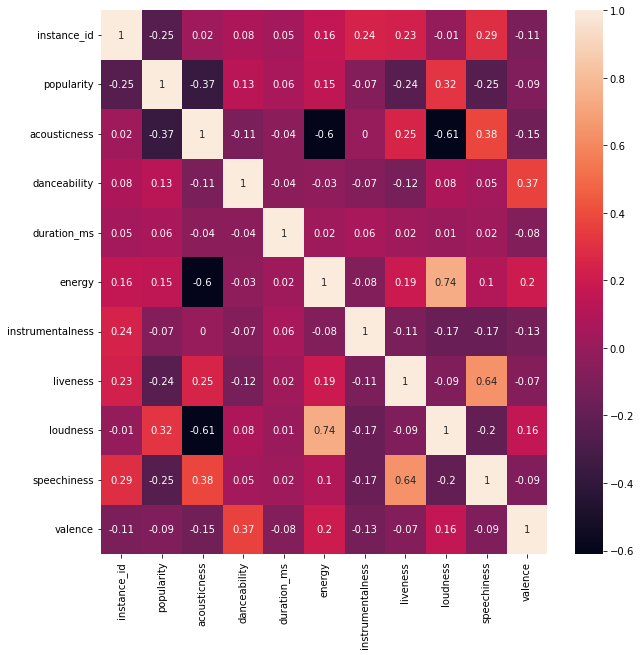

In [25]:
# display correlative numerical features as a heatmap:
num_features_corr_mat = generate_correlation_matrix(train_set)
plt.figure(figsize=(10, 10))
num_features_heatmap = sns.heatmap(num_features_corr_mat.round(2), annot=True)

In [26]:
# generate correlation matrix with the target variable 
# of interest ('SalePrice'):
corr_mat_with_id = pd.DataFrame(train_set.corr()["instance_id"][:-1])

# sort from highest to smallest value (desc. order):
corr_mat_with_id = abs(corr_mat_with_id)
corr_mat_with_id = corr_mat_with_id.sort_values(by="instance_id", ascending=False)

# display top 5 numerical features highly correlated with the 
# target variable (“SalePrice”) according to the pearson correlation:
corr_mat_with_id.columns = ["instance_id corr."]
corr_mat_with_id.head(5)

instance_id corr.
instance_id                1.000000
speechiness                0.290613
popularity                 0.245043
instrumentalness           0.242293
liveness                   0.227449

Indicative that instance_id may not serve as an important role in this dataset compared to the titanic dataset.

**Presence of skewness in feature distributions:**

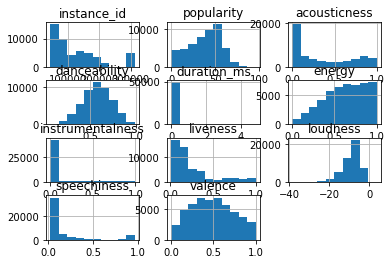

In [27]:
# construct a univariate plot of each feature:
train_set.hist()
plt.show()

It can be observed that among the univariate plots of each numerical feature that the features **danceability**, and arguably, **valence** and **loudness**, approximate a Gaussian distribution. The other 8 numerical features, however, appear to be significantly skewed in their distributions. This is important to note because many machine learning techniques assume a Gaussian univariate distribution on the input features. The presence of skewness in the distribution of the features will cause the machine learning model to learn the bias which is not good.

Sources:

[6] https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070